<a href="https://colab.research.google.com/github/Ayo-d-creator/Convolutional-Neural-Network/blob/Cats-vs-Dogs/Cat_and_Dogs_Final_By_Ay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from matplotlib.image import imread

import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
my_image_dir = r'/content/drive/MyDrive/dataset/dog-vs-cat/train'

In [6]:
my_train_image_dir = my_image_dir + '/train'
my_test_image_dir = my_image_dir + '/test'
my_valid_image_dir = my_image_dir + '/valid'

print(os.listdir(my_train_image_dir))
print(os.listdir(my_test_image_dir))
print(os.listdir(my_valid_image_dir))

['dog', 'cat']
['dog', 'cat']
['dog', 'cat']


In [7]:
categories = ['dog', 'cat']

##Single Image Preprocessing

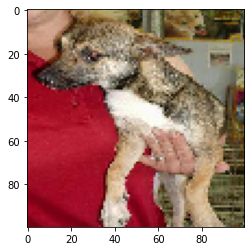

In [8]:
for category in categories:
  path = os.path.join(my_train_image_dir, category)
  class_num = categories.index(category)

  for img in os.listdir(path):
    img_array = load_img(os.path.join(path, img), target_size=(100, 100))
    new_array = img_to_array(img_array)
    plt.imshow(array_to_img(new_array))
    plt.show()
    break
  break


##Batches of Images

In [10]:
train_data = []
test_data = []
valid_data = []

def create_training_data(directory, categories, data):
  for category in categories:
    path = os.path.join(directory, category)
    class_num = categories.index(category)

    for img in os.listdir(path):
      try:
        img_array = load_img(os.path.join(path, img), target_size = (100, 100))
        new_array = img_to_array(img_array)
        data.append([new_array, class_num])
      except Exception as e:
        pass

In [11]:
create_training_data(directory= my_train_image_dir, categories=categories, data = train_data)
create_training_data(directory= my_test_image_dir, categories= categories, data = test_data)
create_training_data(directory= my_valid_image_dir, categories= categories, data= valid_data)

In [12]:
print(len(train_data))
print(len(test_data))
print(len(valid_data))

1000
100
200


In [13]:
import random

random.shuffle([train_data, test_data, valid_data])

In [36]:
X_train = []
y_train = []
X_test = []
y_test = []
X_valid = []
y_valid = []

In [37]:
def get_features_and_labels(data, features ,labels):
  for feature, label in data:
    features.append(feature)
    labels.append(label)
  return features, labels


In [38]:
X_train, y_train = get_features_and_labels(data= train_data, features= X_train, labels = y_train)
X_test, y_test = get_features_and_labels(data= test_data, features= X_test, labels = y_test)
X_valid, y_valid = get_features_and_labels(data= valid_data, features= X_valid, labels = y_valid)

In [39]:
len(X_train)

1000

In [40]:
len(X_valid)

200

In [41]:
print(len(X_train), len(y_train),
      len(X_test), len(y_test),
      len(X_valid), len(y_valid))

1000 1000 100 100 200 200


In [42]:
# We are changing the format from a list of arrays to an array of array

X_train = np.array(X_train)
X_test = np.array(X_test)
X_valid = np.array(X_valid)

y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)

In [43]:
# this is to confirm the type of the varibles, the format 

print(type(X_train), type(X_valid), type(X_test),
      type(y_test), type(y_train), type(y_valid))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


Text(0.5, 1.0, 'dog')

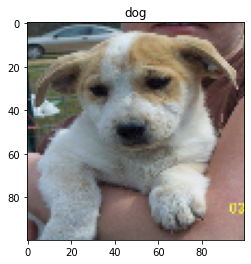

In [44]:
plt.imshow(array_to_img(X_train[320]))
plt.title(categories[y_train[320]])

## Scaling the Data

In [45]:
# We are rescaling the data here for normalization sake

def rescale(data):

  data/data.max()
  return data

In [46]:
X_train.max()

255.0

In [47]:
# please note, we are only rescaling the features not the labels since those ones are just arrarys and not images

X_train = rescale(X_train)
X_test = rescale(X_test)
X_valid = rescale(X_valid)

## Model Building 

In [54]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = [3, 3], padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides= (2,2)))

model.add(Conv2D(filters = 64, kernel_size = [5, 5], padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides= (2,2)))

model.add(Conv2D(filters = 72, kernel_size = [7, 7], padding = 'same',
                 activation = 'relu'))
model.add(MaxPool2D(pool_size= (2,2), strides= (2,2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.3))

model.add(Dense(units = 64, activation= 'relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Importing Callbacks for a smooth model

In [53]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [55]:
early = EarlyStopping(monitor= 'val_loss', mode = 'min', patience = 4)
checkpoint = ModelCheckpoint(filepath="weights.{epoch:02d}-{val_loss:.2f}.hdf5",
                             monitor='val_loss', mode = "min", save_best_only=True)

Fitting the data into the model - with Validation Data first

In [56]:
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), callbacks = [early, checkpoint], epochs = 200, batch_size= 32)

Epoch 1/200
32/32 [==============================] - 8s 22ms/step - loss: 13.0145 - accuracy: 0.4954 - val_loss: 0.7186 - val_accuracy: 0.4900
Epoch 2/200
32/32 [==============================] - 0s 14ms/step - loss: 0.6901 - accuracy: 0.5464 - val_loss: 0.6887 - val_accuracy: 0.5650
Epoch 3/200
32/32 [==============================] - 0s 14ms/step - loss: 0.6904 - accuracy: 0.5354 - val_loss: 0.6870 - val_accuracy: 0.5650
Epoch 4/200
32/32 [==============================] - 0s 14ms/step - loss: 0.6850 - accuracy: 0.5509 - val_loss: 0.6749 - val_accuracy: 0.5550
Epoch 5/200
32/32 [==============================] - 0s 15ms/step - loss: 0.6625 - accuracy: 0.6005 - val_loss: 0.6822 - val_accuracy: 0.5600
Epoch 6/200
32/32 [==============================] - 0s 14ms/step - loss: 0.6475 - accuracy: 0.6068 - val_loss: 0.7039 - val_accuracy: 0.5050
Epoch 7/200
32/32 [==============================] - 0s 14ms/step - loss: 0.6870 - accuracy: 0.5260 - val_loss: 0.6820 - val_accuracy: 0.6100
Epoch

Saving the model - for referencing

In [57]:
model.save('cat and dogs.h5')

Model Visualization 

In [62]:
loss = pd.DataFrame(model.history.history)

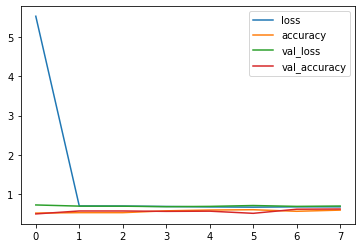

In [63]:
loss.plot()

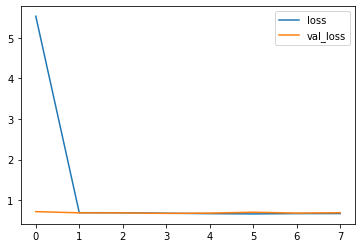

In [64]:
loss[['loss', 'val_loss']].plot()

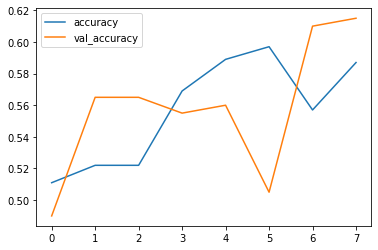

In [65]:
loss[['accuracy', 'val_accuracy']].plot()

Testing out the Model

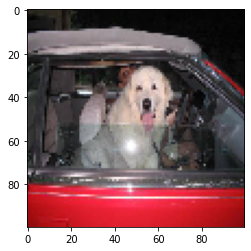

In [80]:
Single_image = X_train[78]

plt.imshow(array_to_img(Single_image))

In [81]:
pred = model.predict_classes(np.expand_dims(Single_image,axis=0))

In [82]:
for i in pred:
  for j in i:
    print(categories[j])

dog


In [ ]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")
